In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns


In [ ]:
x,y=make_circles(n_samples=100,noise=0.1,random_state=1)

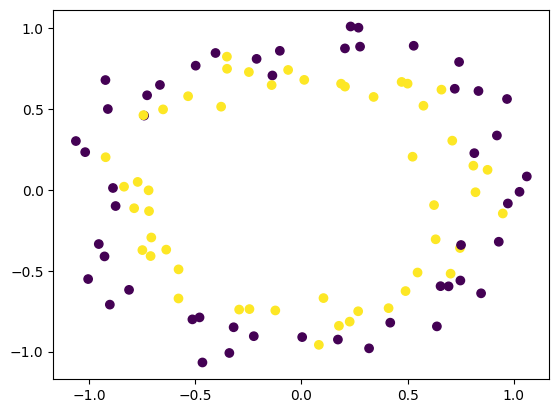

In [ ]:
# x
plt.scatter(x[:,0],x[:,1],c=y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=200,verbose=0)

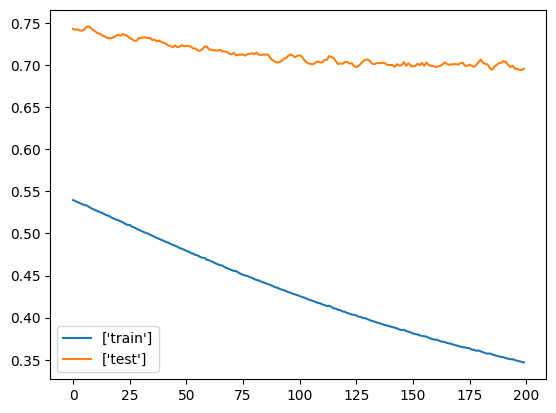

In [ ]:
plt.plot(history.history['loss'],label=['train'])
plt.plot(history.history['val_loss'],label=['test'])
plt.legend()
plt.show()

9600/9600 [==============================] - 14s 1ms/step


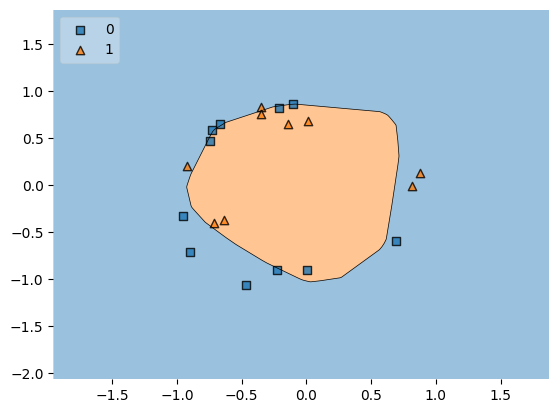

In [ ]:
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()

In [ ]:
###--------------Early Stopping-------------------###
model=Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.2,epochs=500,callbacks=callback)

Epoch 1/500
2/2 [==============================] - 0s 110ms/step - loss: 0.6677 - accuracy: 0.5312 - val_loss: 0.7608 - val_accuracy: 0.3125
Epoch 2/500
2/2 [==============================] - 0s 32ms/step - loss: 0.6672 - accuracy: 0.5312 - val_loss: 0.7617 - val_accuracy: 0.3125
Epoch 3/500
2/2 [==============================] - 0s 30ms/step - loss: 0.6661 - accuracy: 0.5312 - val_loss: 0.7634 - val_accuracy: 0.3125
Epoch 4/500
2/2 [==============================] - 0s 34ms/step - loss: 0.6655 - accuracy: 0.5312 - val_loss: 0.7653 - val_accuracy: 0.3125
Epoch 5/500
2/2 [==============================] - 0s 31ms/step - loss: 0.6646 - accuracy: 0.5469 - val_loss: 0.7663 - val_accuracy: 0.3125
Epoch 6/500
2/2 [==============================] - 0s 33ms/step - loss: 0.6640 - accuracy: 0.5469 - val_loss: 0.7669 - val_accuracy: 0.3125
Epoch 7/500
2/2 [==============================] - 0s 51ms/step - loss: 0.6631 - accuracy: 0.5469 - val_loss: 0.7679 - val_accuracy: 0.3125
Epoch 8/500
2/2 [==

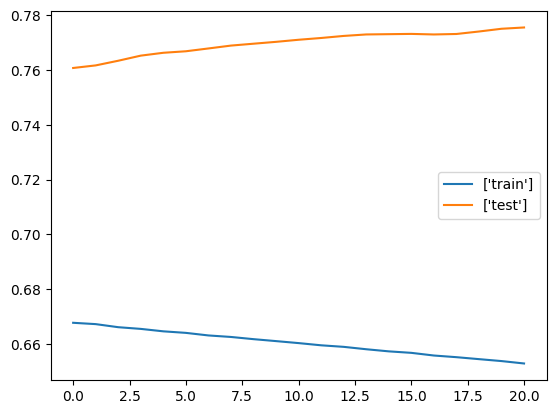

In [ ]:
plt.plot(history.history['loss'],label=['train'])
plt.plot(history.history['val_loss'],label=['test'])
plt.legend()
plt.show()

9600/9600 [==============================] - 15s 2ms/step


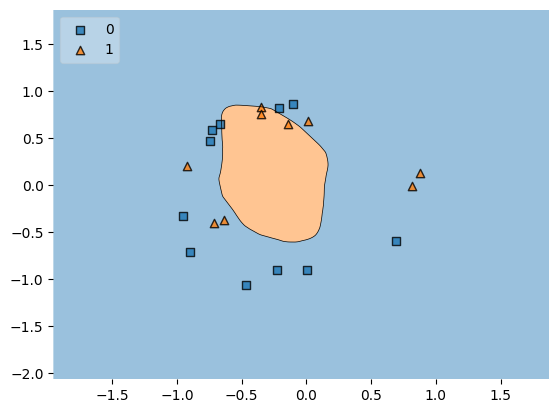

In [ ]:
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)
plt.show()